In [1]:
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import scienceplots
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from tabulate import tabulate
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors._classification import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

plt.rcParams['figure.dpi'] = 400

plt.style.use('science')

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,coefs = None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=42,n_jobs=-1)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(8, 4))

        bar_width = 0.1
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 1.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.set_ylabel('Importance')
        ax.legend()

        plt.tight_layout()
        plt.show()
def plot_feature_mean_squared_error(models, X, y, colors=None,cv = 5,random_state = 123):
    # Dictionary to store feature importance results
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Define a function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Create a scorer using the RMSE function
    rmse_scorer = make_scorer(rmse, greater_is_better=False)

    mean_rmse = {}
    model_names = []
    for model_name,model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer,n_jobs=-1)
        mean_rmse[model_name] = -np.mean(cross_val_scores)
        model_names.append(model_name)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_rmse.values(),color = colors)
        plt.xlabel('Root Mean Squared Error')
        plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:

raw_dataset = pd.read_csv("auto-mpg.csv",
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.drop('car name',axis=1,inplace=True)
dataset.drop('origin',axis=1,inplace=True)
display(dataset)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
393          82  
394          82  
395          82  
396          82  
397          82  

[392 rows x 7 columns]

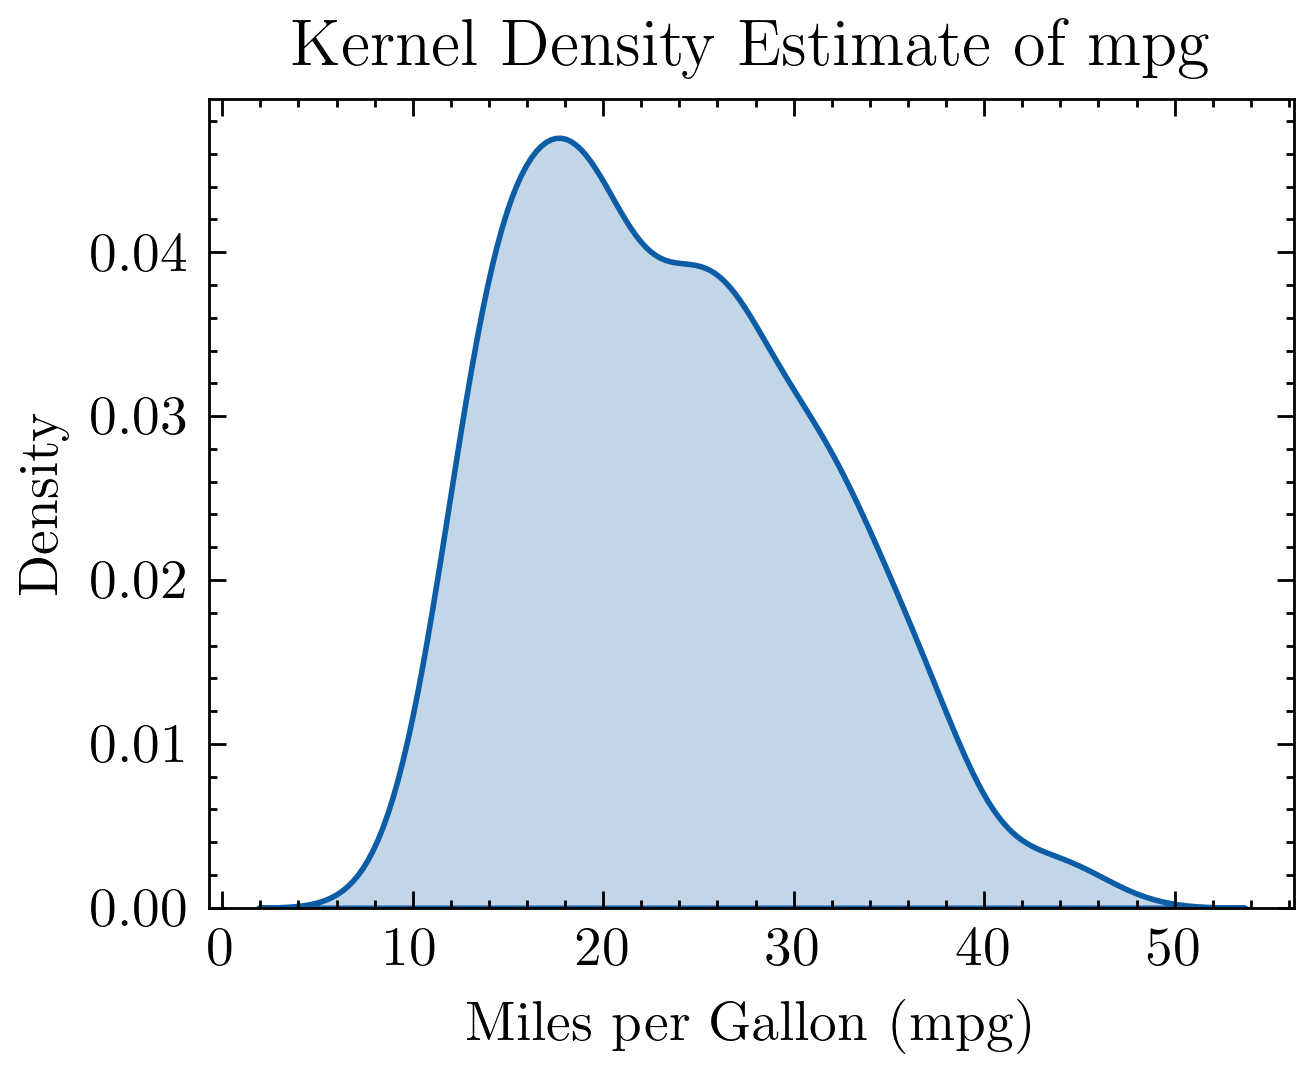

In [3]:
sns.kdeplot(dataset['mpg'], shade=True)
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of mpg')
plt.show()

In [4]:
x = dataset.drop(columns=['mpg'])
y = dataset["mpg"]
x .head()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
numeric_columns = x.columns.values.tolist()

linear_regression_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns),
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', LinearRegression())
])

linear_regression_model.fit(x_train, y_train)
pred = linear_regression_model.predict(x_test)
print(r2_score(y_test, pred))
print('MSE lr:', metrics.mean_squared_error(y_test, pred))
print('RMSE lr:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


random_forest_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', RandomForestRegressor())
])

random_forest_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', RandomForestRegressor())
])
random_forest_model.fit(x_train, y_train)
pred = random_forest_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE rf:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
xgb_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', xgb.XGBRegressor())
])

xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE xgb:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.8296418772368707
MSE lr: 10.470611485141243
RMSE lr: 3.235832425380097
0.8971797625651953
RMSE rf: 2.5138762846813965
0.8551536705512377
RMSE xgb: 2.98372193372177


In [5]:
svm_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', SVR(kernel='linear'))
])
svm_model.fit(x_train, y_train)
pred = svm_model.predict(x_test)
print(r2_score(y_test, pred))
print('MSE svm:', metrics.mean_squared_error(y_test, pred))
print('RMSE svm:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.8129351093429042
MSE svm: 11.497448790887917
RMSE svm: 3.3907888154363017


In [6]:
display(x_train)

cylinders  displacement  horsepower  weight  acceleration  model year
49           4         116.0        90.0    2123          14.0          71
46           6         250.0       100.0    3282          15.0          71
306          4         151.0        90.0    2556          13.2          79
13           8         455.0       225.0    3086          10.0          70
129          4          71.0        65.0    1836          21.0          74
..         ...           ...         ...     ...           ...         ...
349          4         105.0        74.0    2190          14.2          81
138          8         304.0       150.0    4257          15.5          74
41           8         383.0       180.0    4955          11.5          71
190          6         250.0       105.0    3353          14.5          76
66           8         429.0       208.0    4633          11.0          72

[313 rows x 6 columns]

In [81]:
dnn_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', MLPRegressor(hidden_layer_sizes=(128),random_state=1, max_iter=2000))
])
dnn_model.fit(x_train, y_train)
pred = dnn_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE dnn:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.8988509918537976
RMSE dnn: 2.451912388517421


In [82]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', KNeighborsRegressor())
])
knn_model.fit(x_train, y_train)
pred = knn_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE dnn:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.871761091905795
RMSE dnn: 2.760794235383467


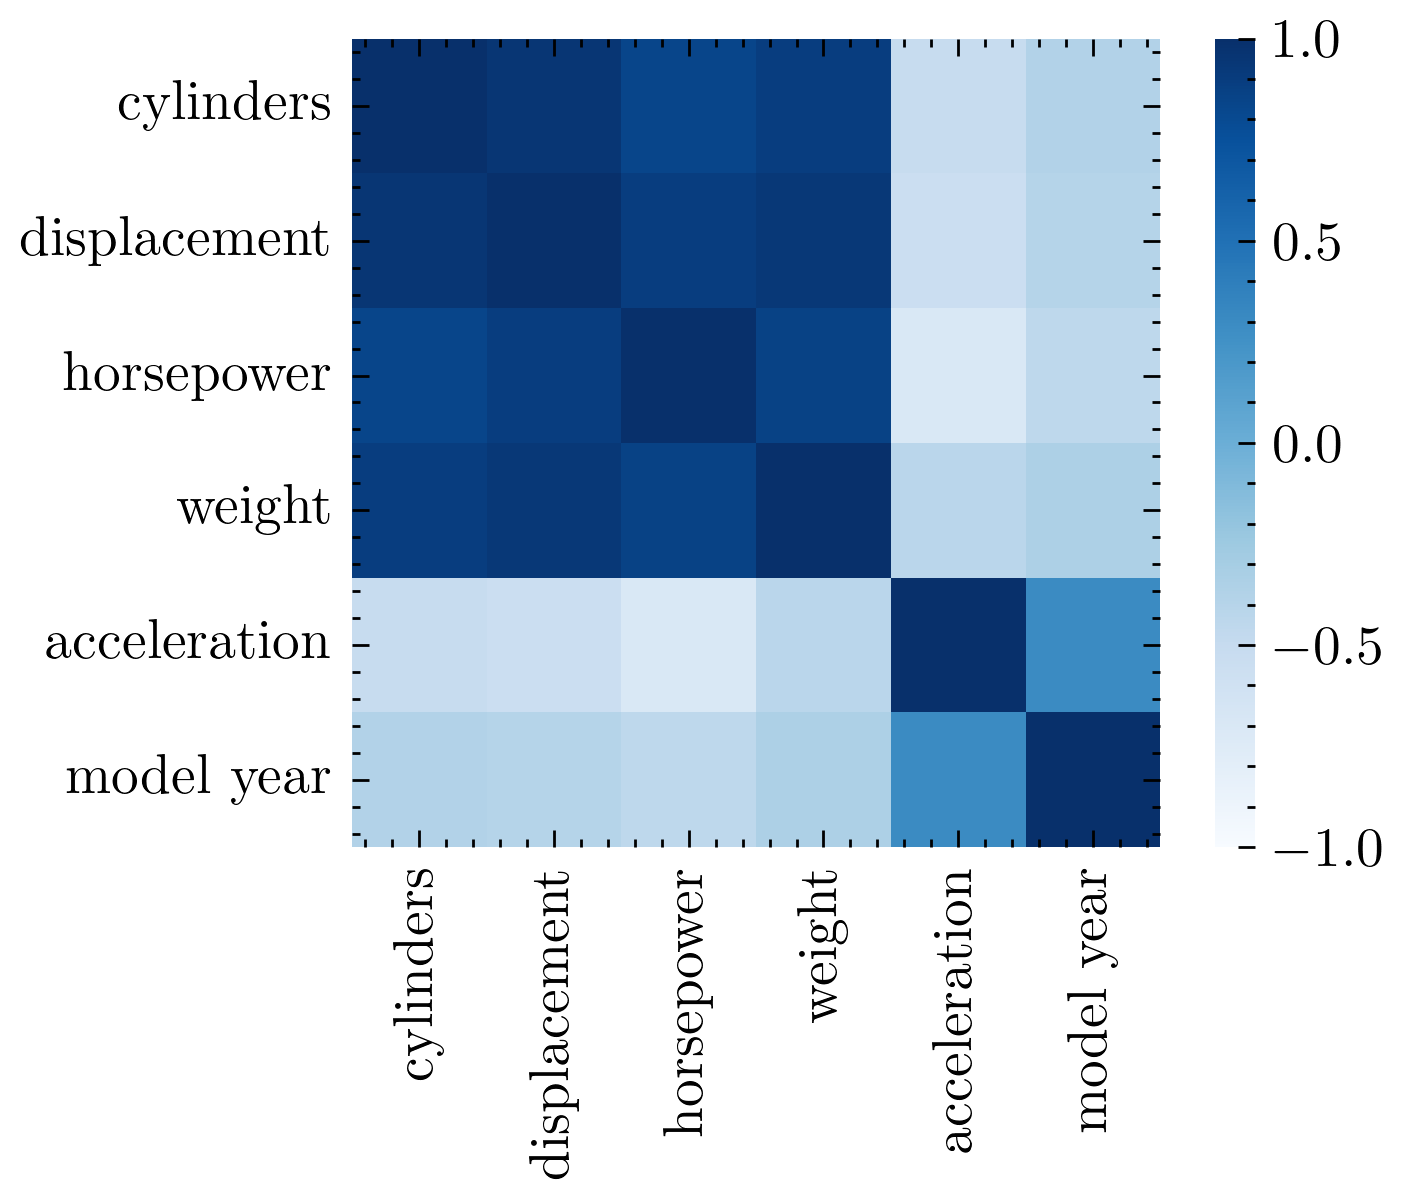

In [83]:
from dython.nominal import associations  # correlation calculation

with plt.style.context('science'):
    fig, ax = plt.subplots()
    correlation_matrix = associations(
            x_train, compute_only=False, figsize=(15, 15),cmap="Blues",cbar=True,annot=False,ax=ax)
    plt.show()

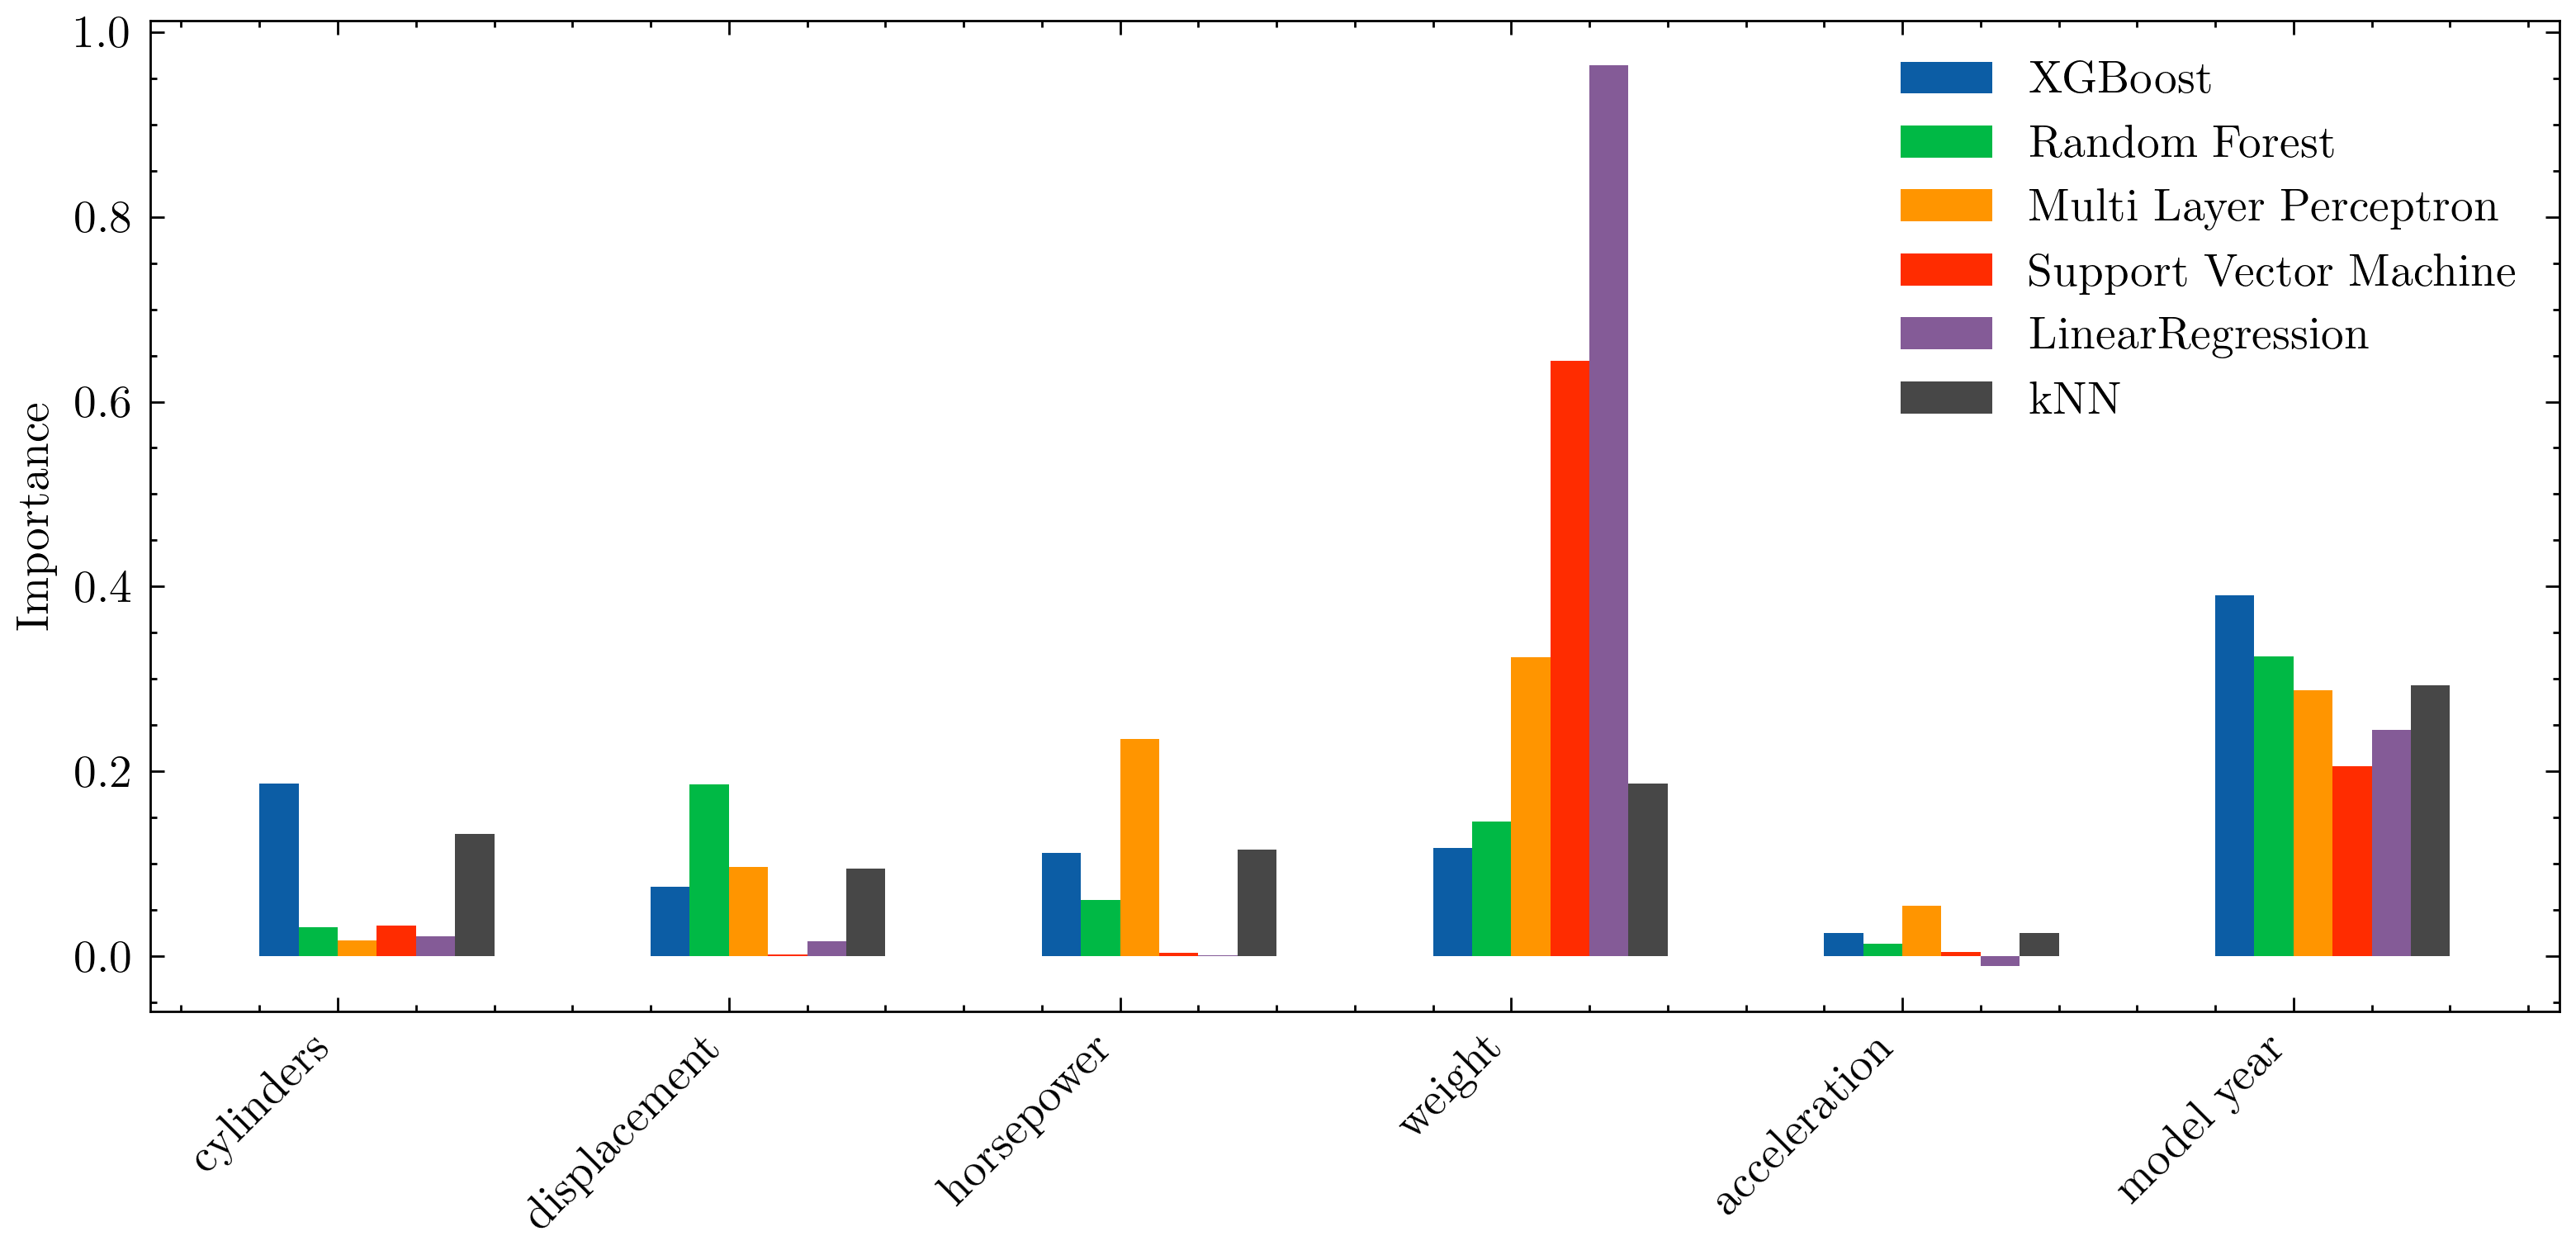

In [39]:
models = {
    'XGBoost': xgb_model,
    'Random Forest': random_forest_model,
    'Multi Layer Perceptron': dnn_model,
    'Support Vector Machine': svm_model,
    "LinearRegression": linear_regression_model,
    "kNN":knn_model
}
num_colors = 10
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_colors = color_cycle[:num_colors]
plot_feature_importance_comparison(
    models, x_test, y_test, colors=custom_colors)


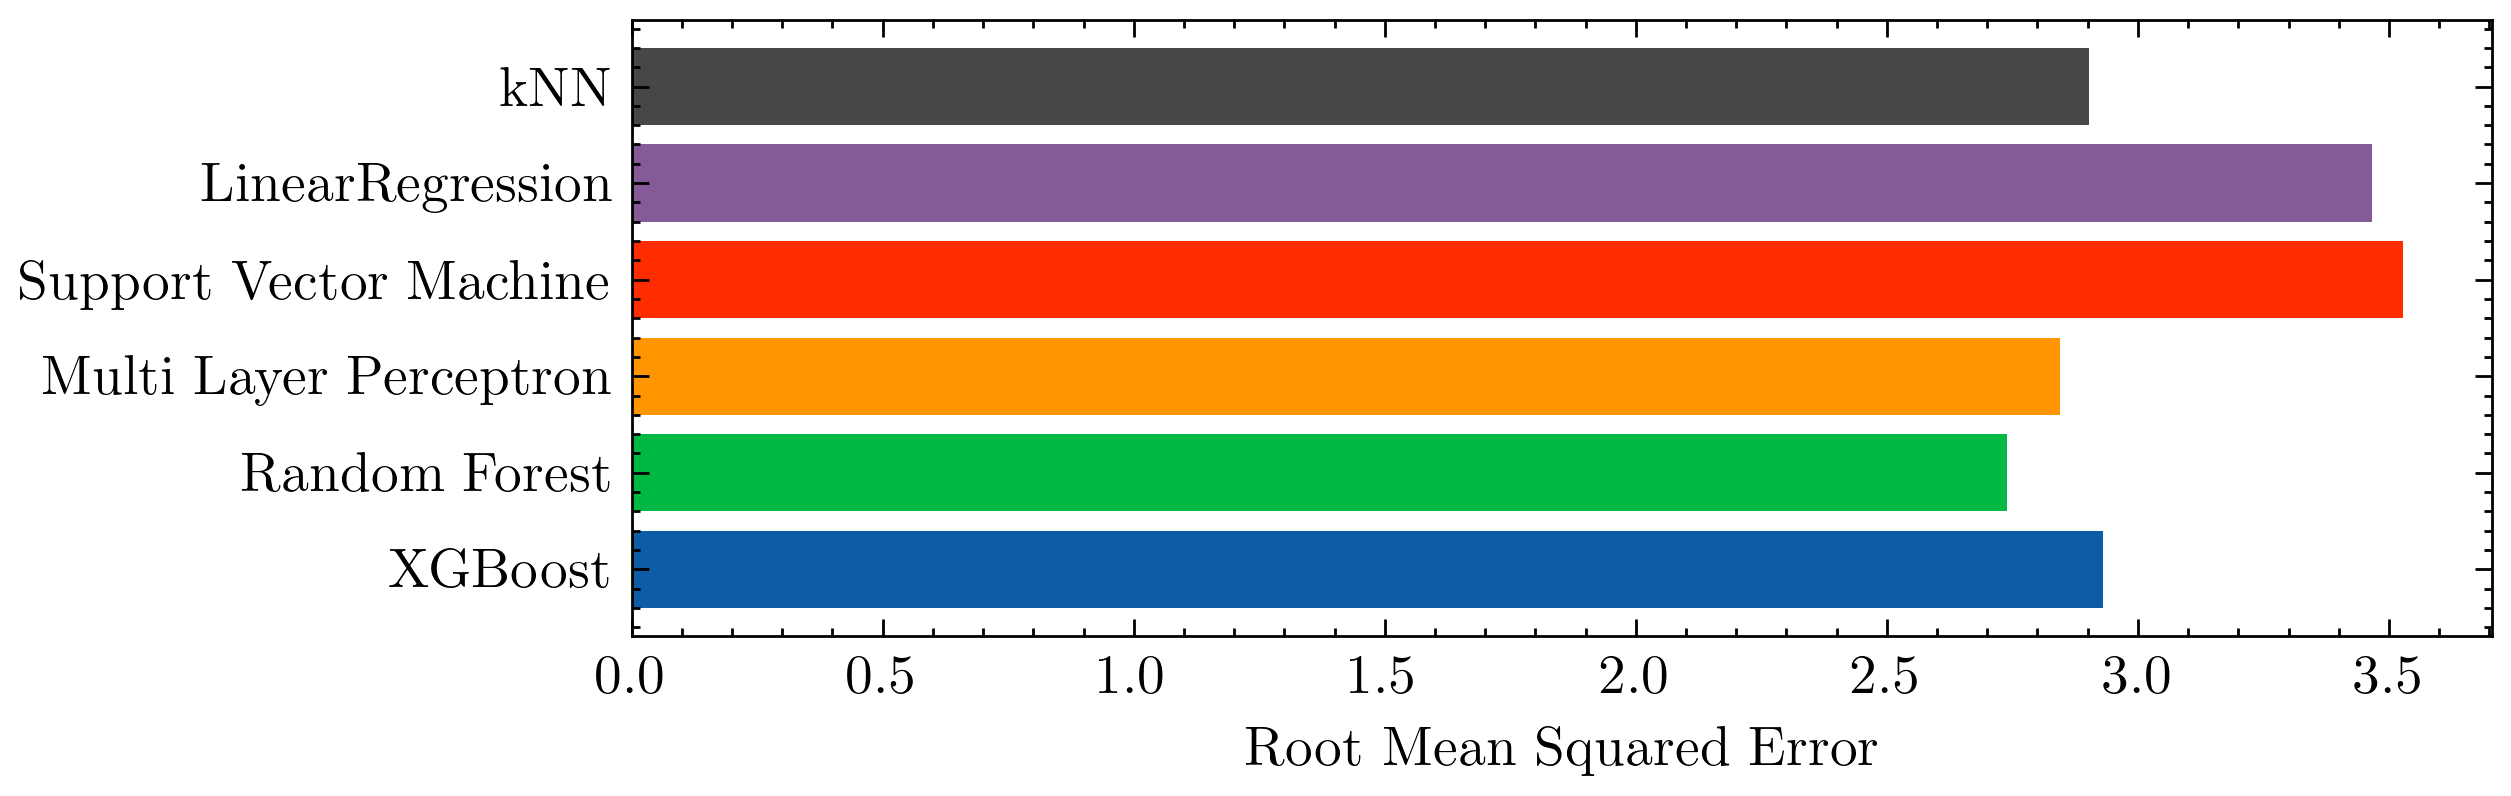

In [40]:
plot_feature_mean_squared_error(models, x_train, y_train, custom_colors)

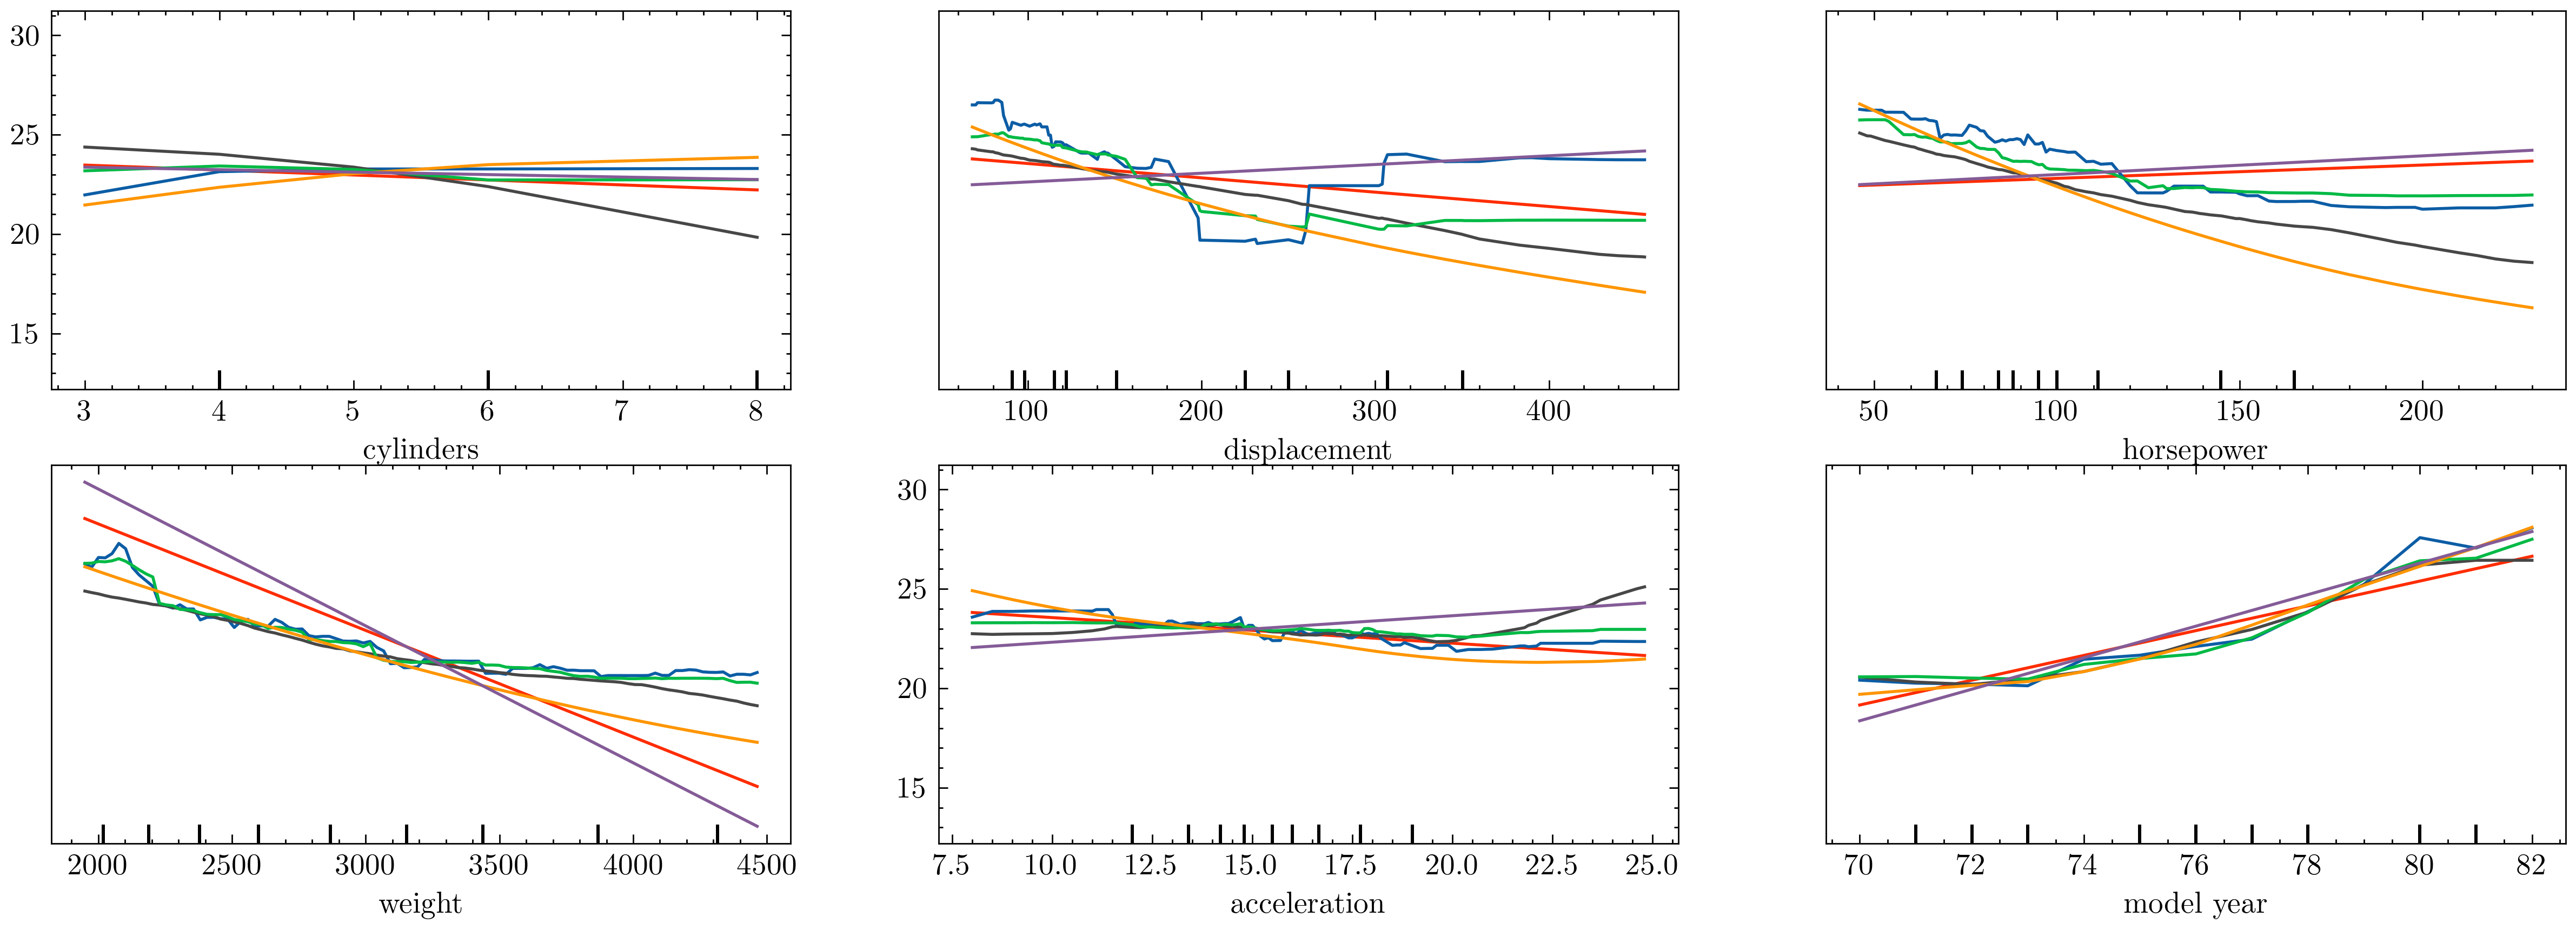

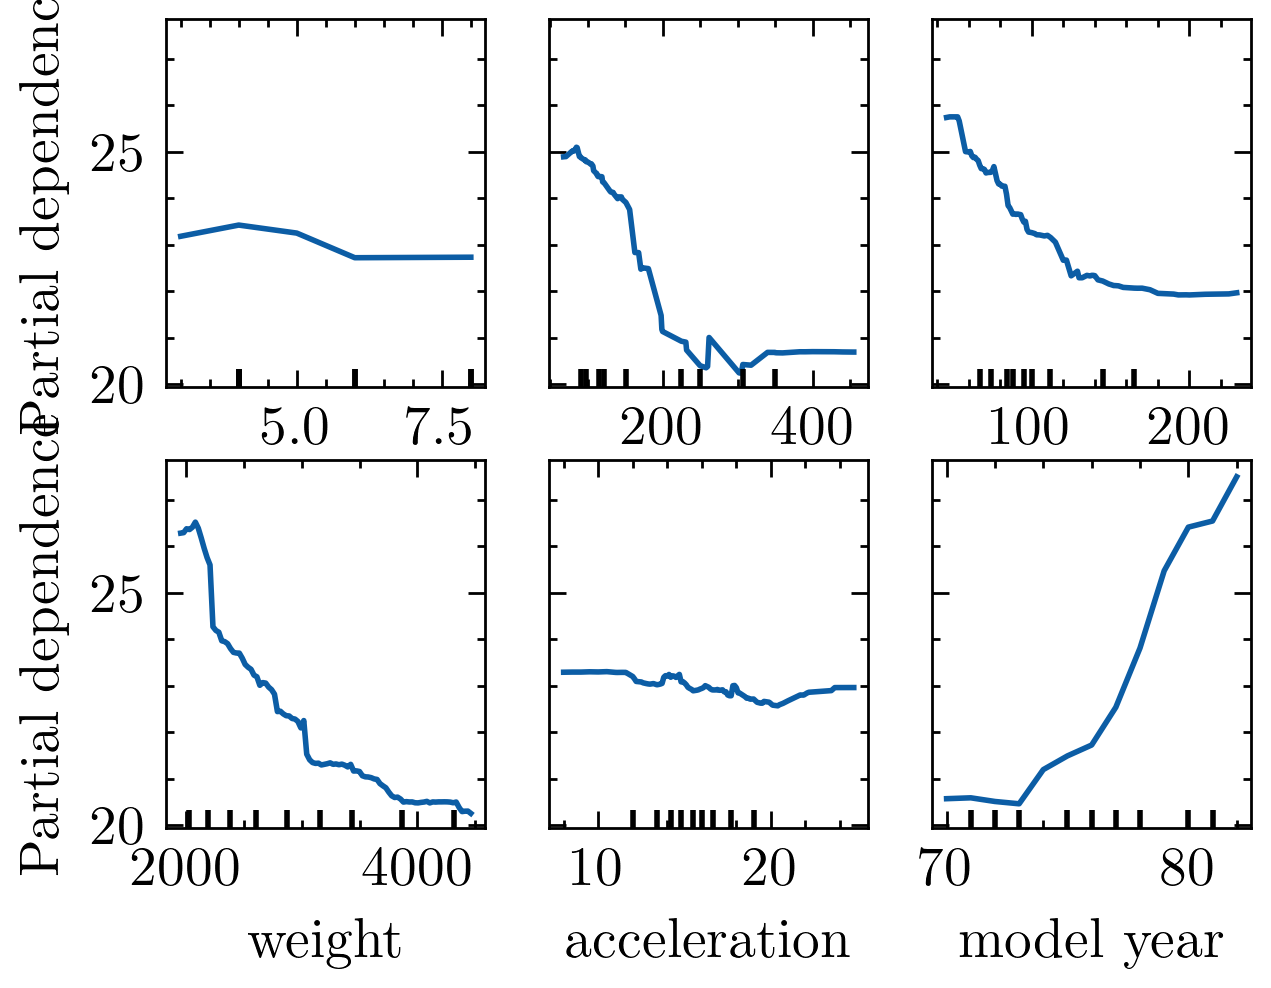

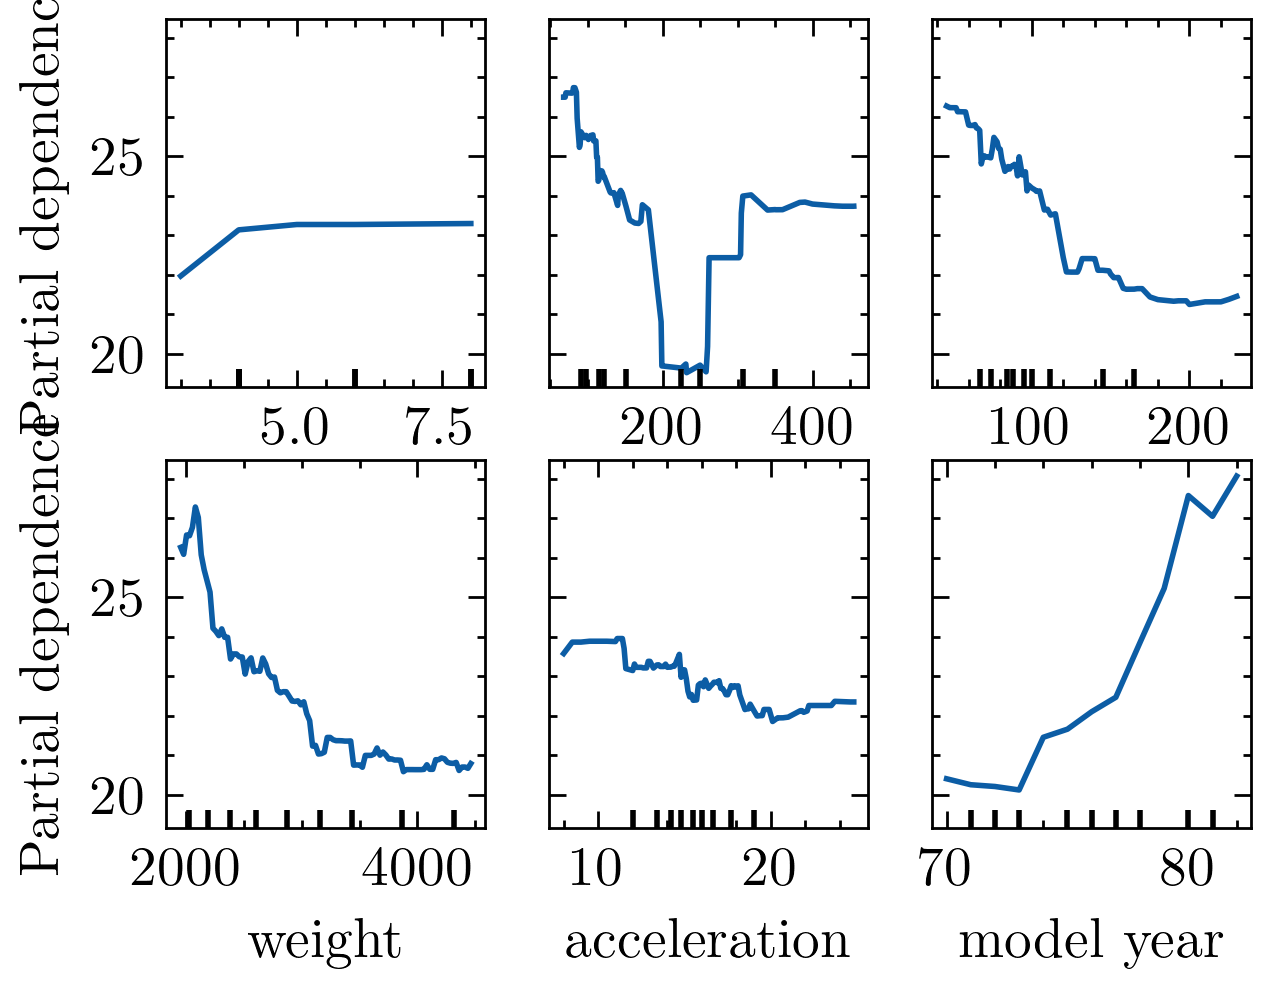

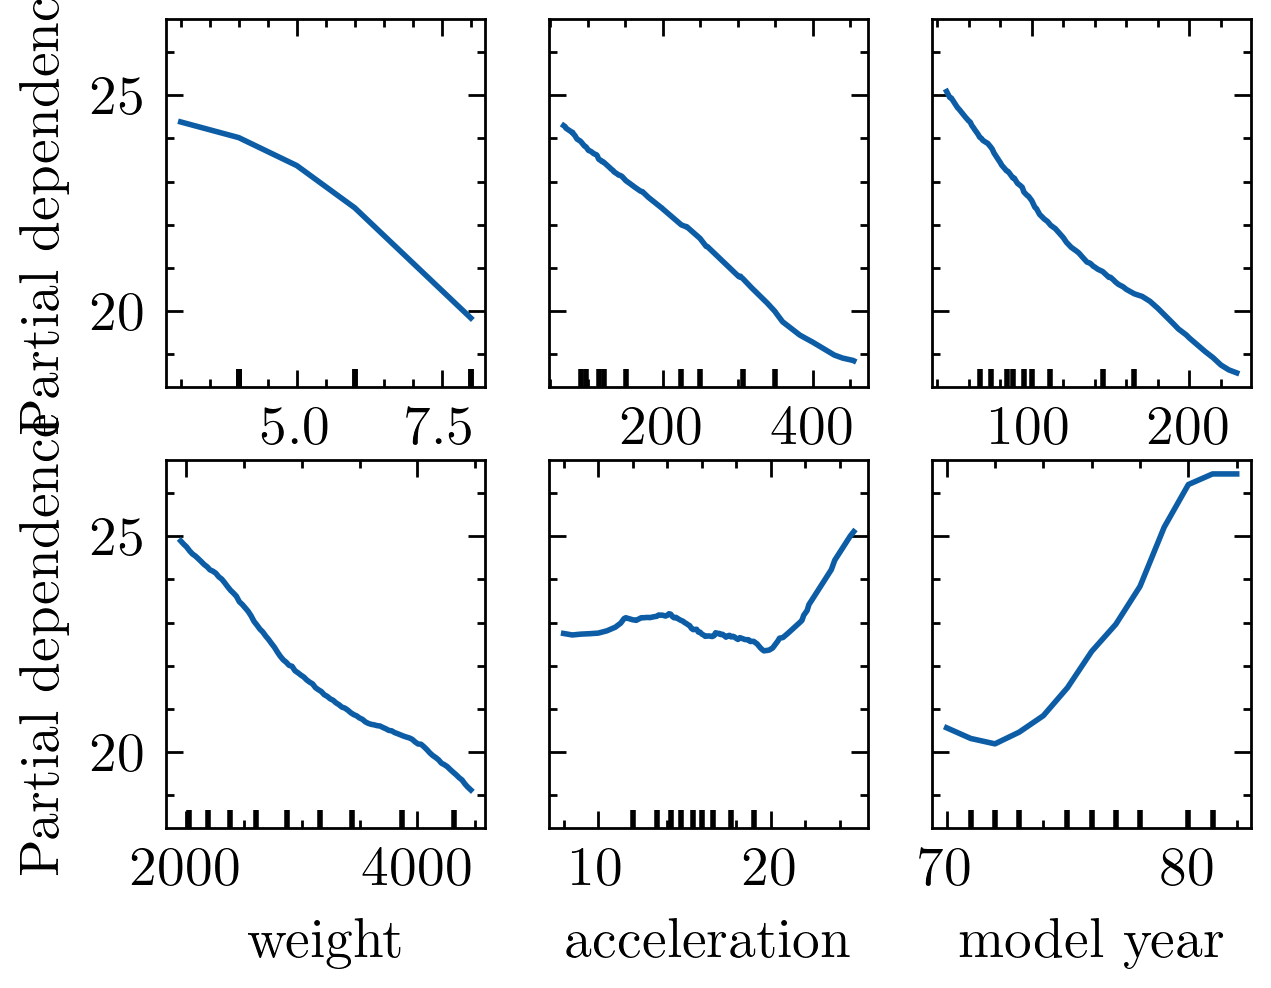

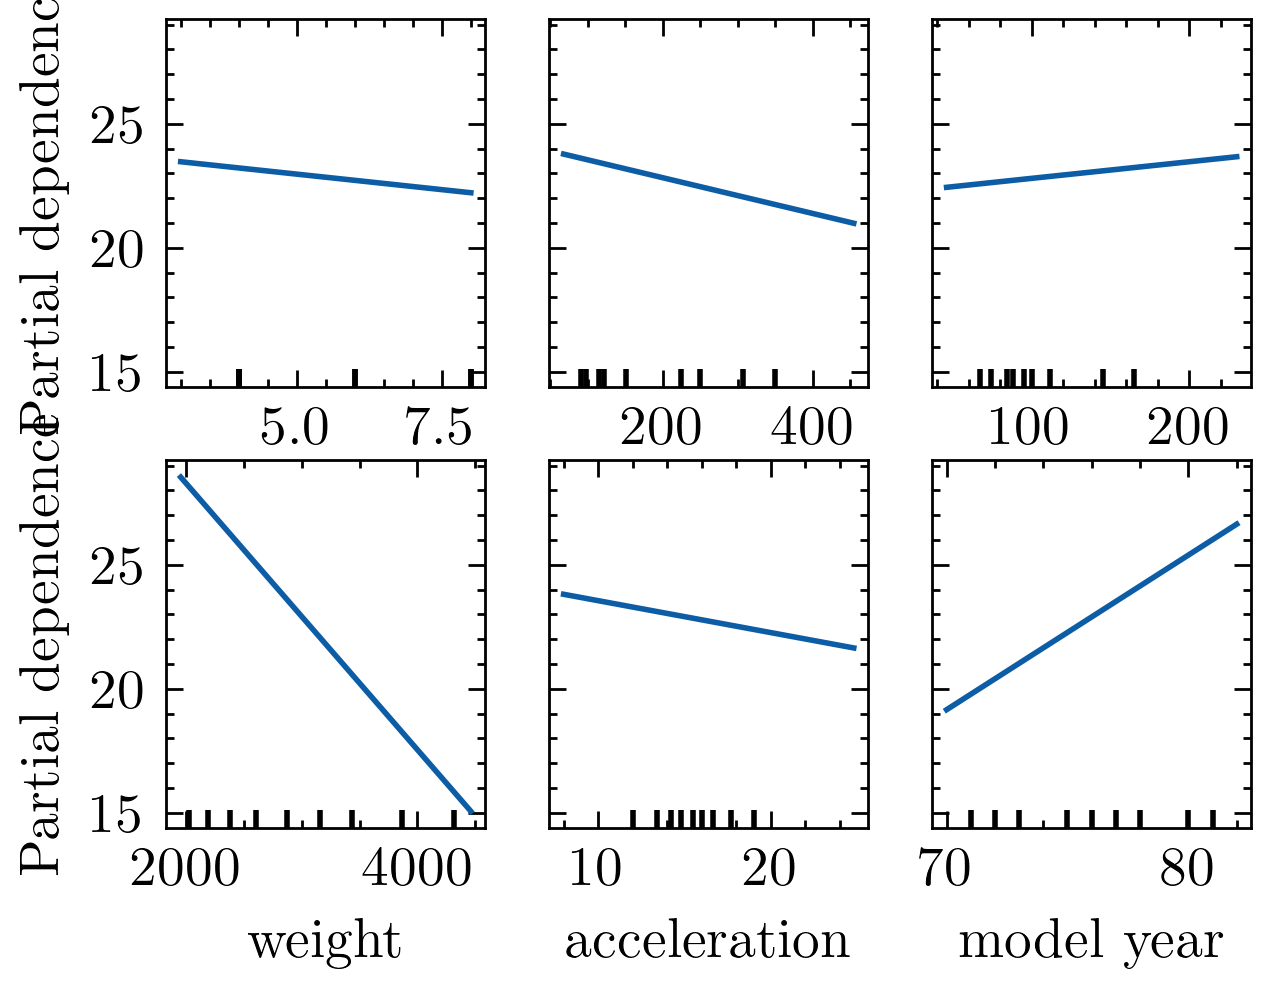

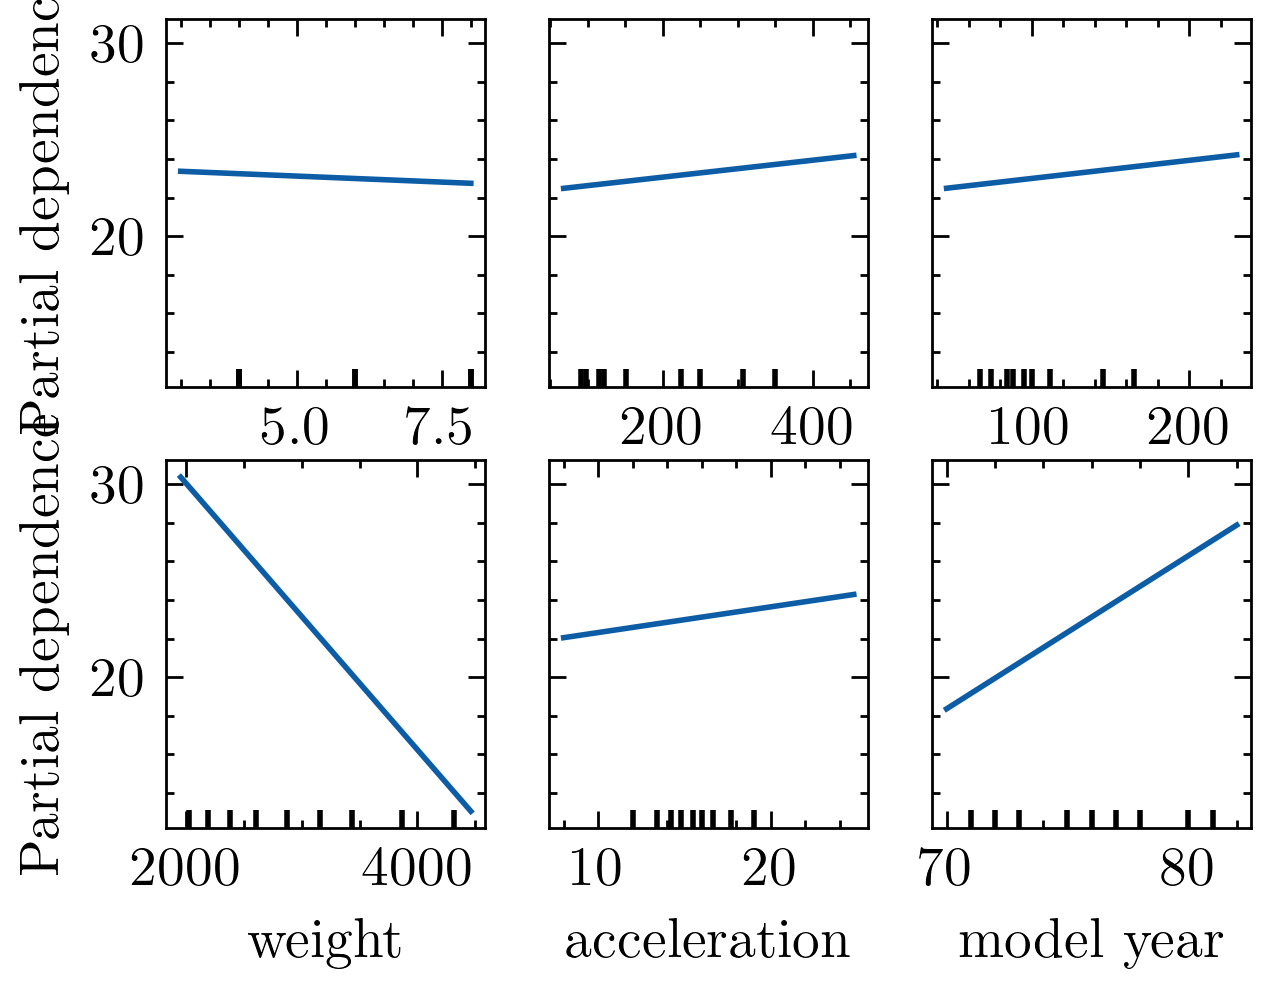

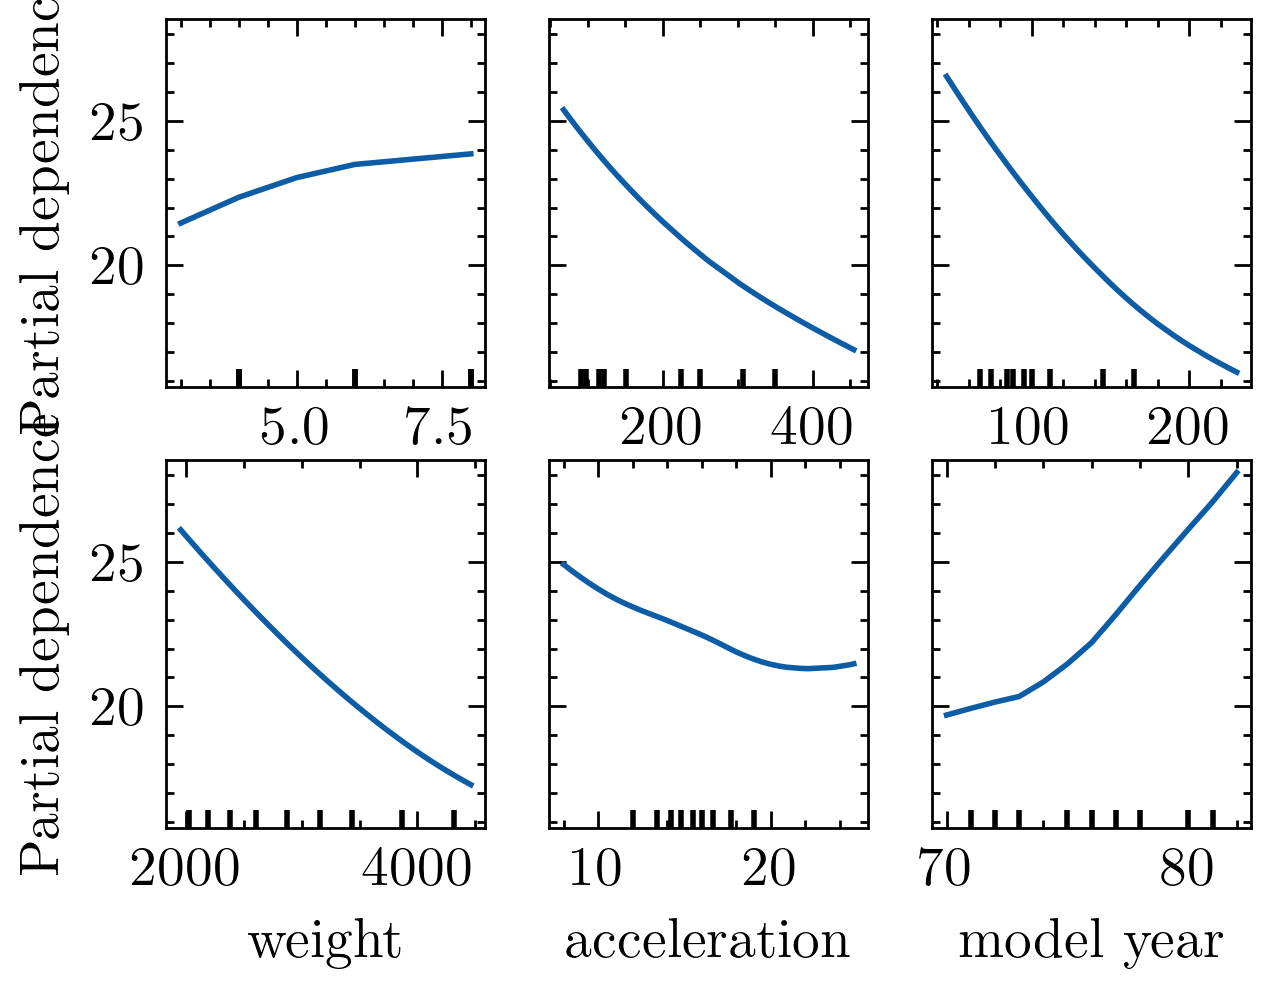

In [85]:
from sklearn.inspection import PartialDependenceDisplay
num_colors = 10
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_colors = color_cycle[:num_colors]
with plt.style.context('science'):
    features = numeric_columns
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
        2, 3, figsize=(15, 5))  # (rows, columns, index)
    rf_disp = PartialDependenceDisplay.from_estimator(
        random_forest_model, x_train, features=features, feature_names=x.columns,n_jobs=-1)
    xgb_disp = PartialDependenceDisplay.from_estimator(
        xgb_model, x_train, features=features, feature_names=x.columns,n_jobs=-1)
    knn_disp = PartialDependenceDisplay.from_estimator(
        knn_model, x_train, features=features, feature_names=x.columns,n_jobs=-1)
    svm_disp = PartialDependenceDisplay.from_estimator(
        svm_model, x_train, features=features, feature_names=x.columns,n_jobs=-1)
    lr_disp = PartialDependenceDisplay.from_estimator(
        linear_regression_model, x_train, features=features, feature_names=x.columns,n_jobs=-1)
    mlrp_disp = PartialDependenceDisplay.from_estimator(
        dnn_model, x_train, features=features, feature_names=x.columns,n_jobs=-1)
    svm_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6],
                  line_kw={"label": "NN", "color": custom_colors[3]})
    xgb_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6], line_kw={
                  "label": "xgboost", "color": custom_colors[0]})
    knn_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6], line_kw={
                  "label": "kNN", "color": custom_colors[5]})
    rf_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6], line_kw={
                 "label": "random forest", "color": custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6], line_kw={
                   "label": "NN", "color": custom_colors[2]})
    lr_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6],
                 line_kw={"label": "NN", "color": custom_colors[4]})
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax5.get_legend().remove()
    ax6.get_legend().remove()
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_ylabel('')
    for ax in [ax2, ax3, ax4, ax6]:
        ax.set_yticks([])

    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(
            zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    # fig.legend(lines, labels, fontsize='small')
    plt.show()

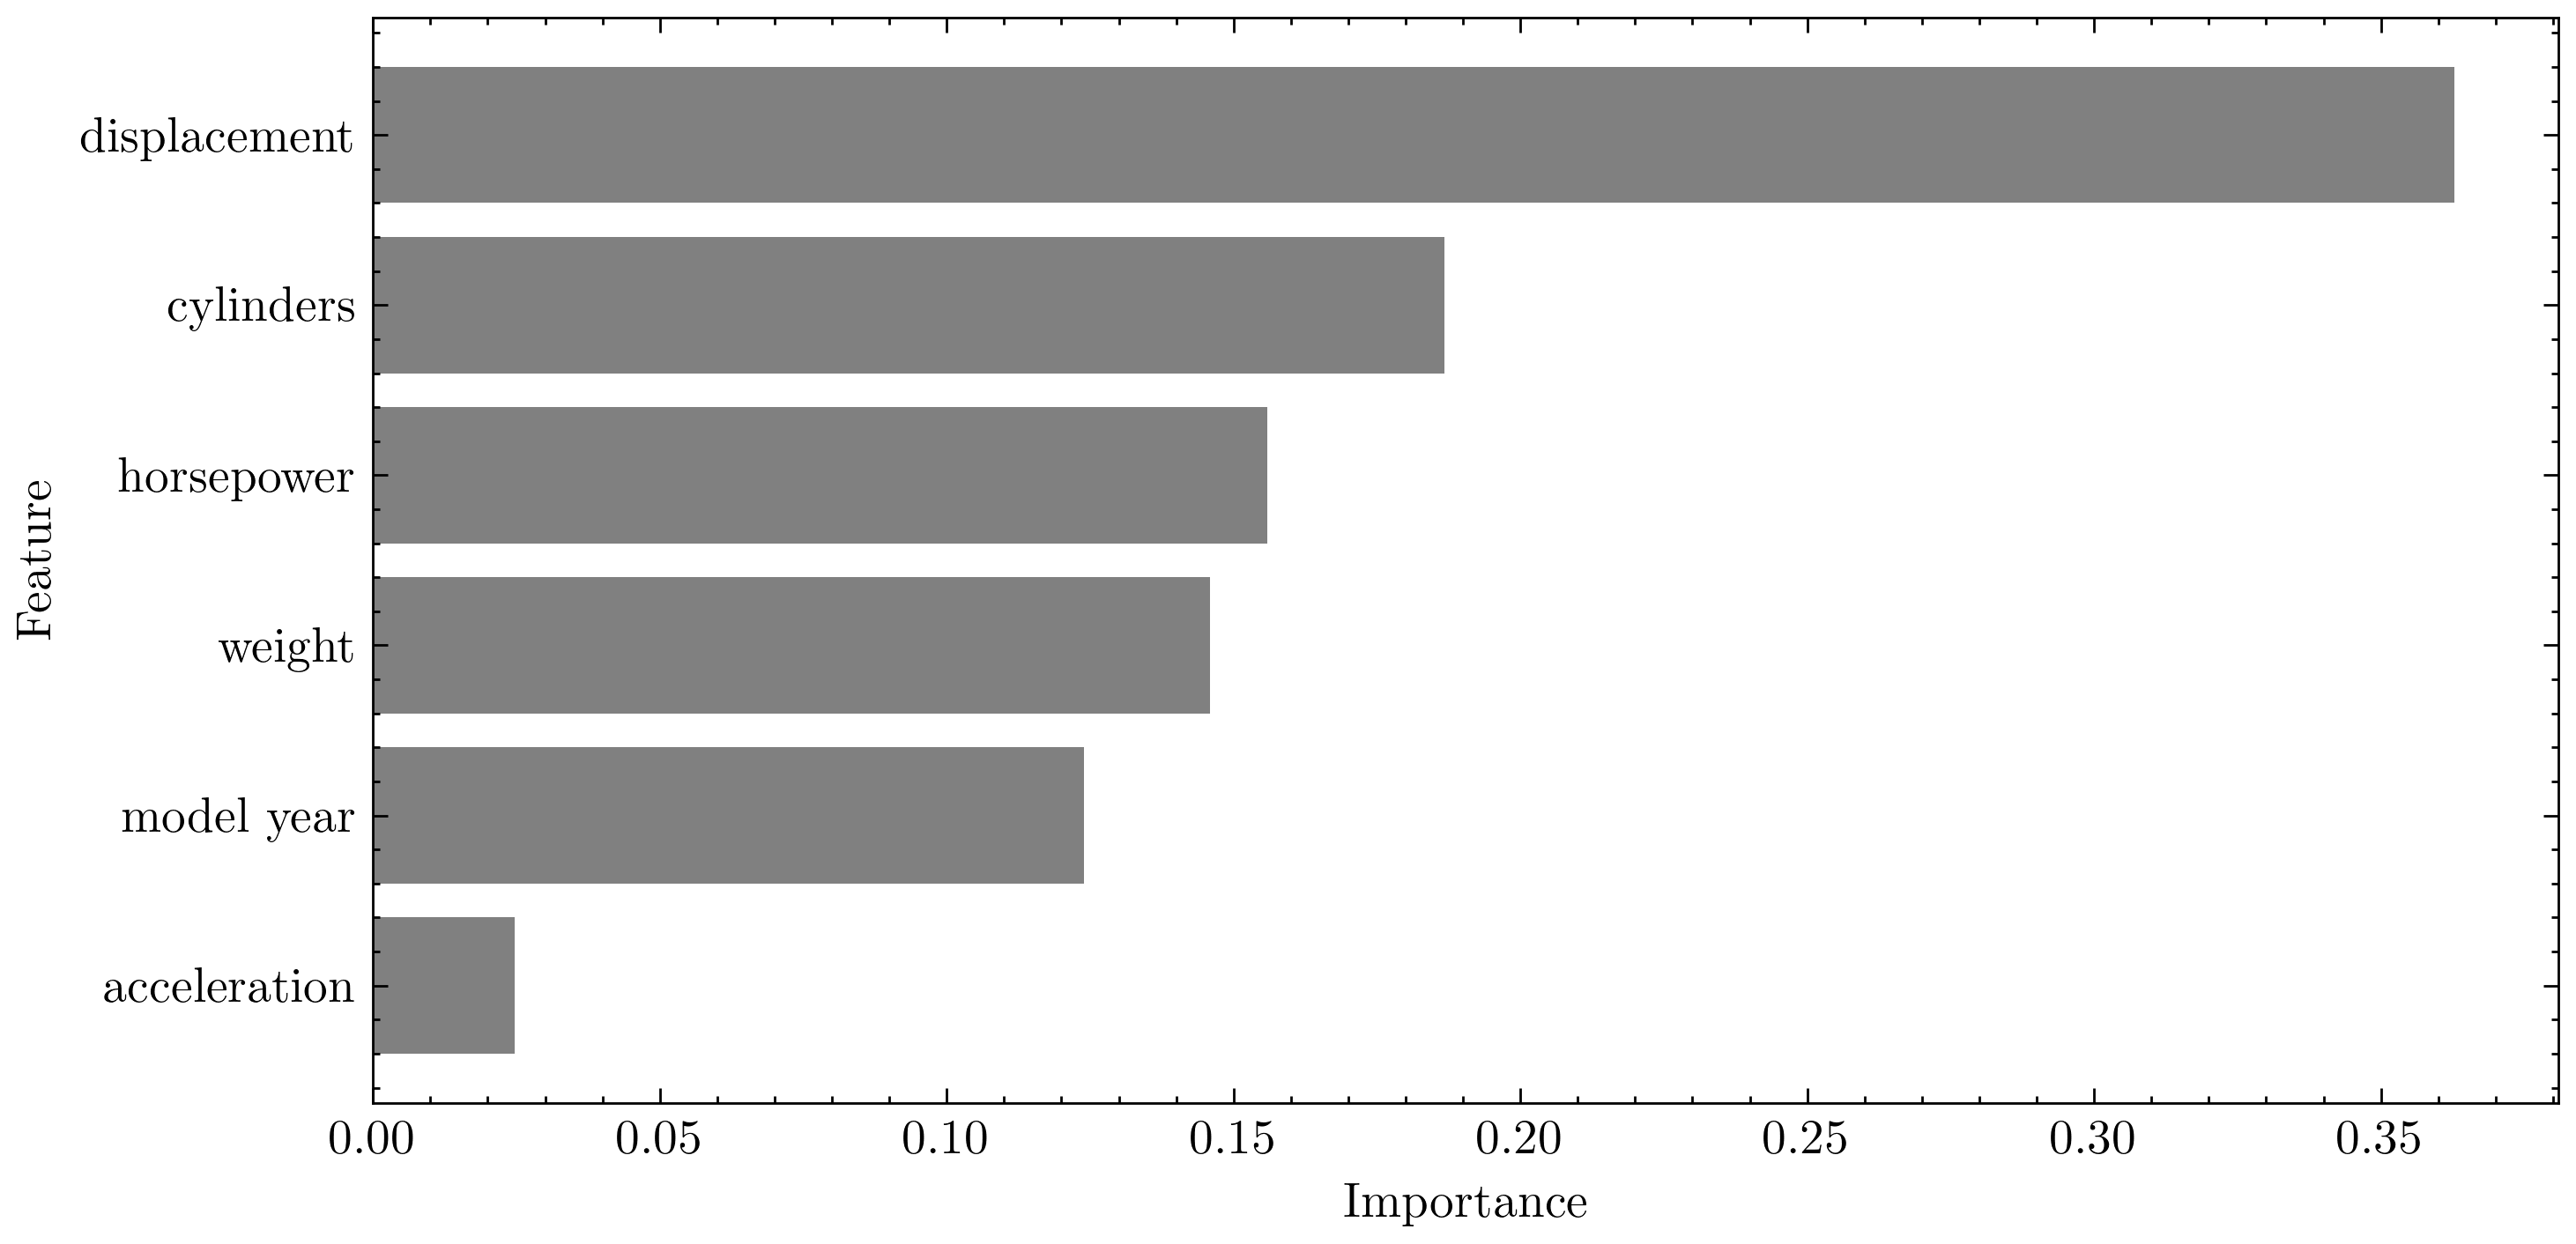

In [68]:
rf_model = random_forest_model.named_steps['regressor']
importances = rf_model.feature_importances_
feature_names = x.columns

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

with plt.style.context('science'):
    plt.figure(figsize=(8,4))
    plt.barh(range(x.shape[1]), sorted_importances, color="grey", align="center")
    plt.yticks(range(x.shape[1]), sorted_feature_names)  # Use feature names as y ticks
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis() 
    plt.show()  

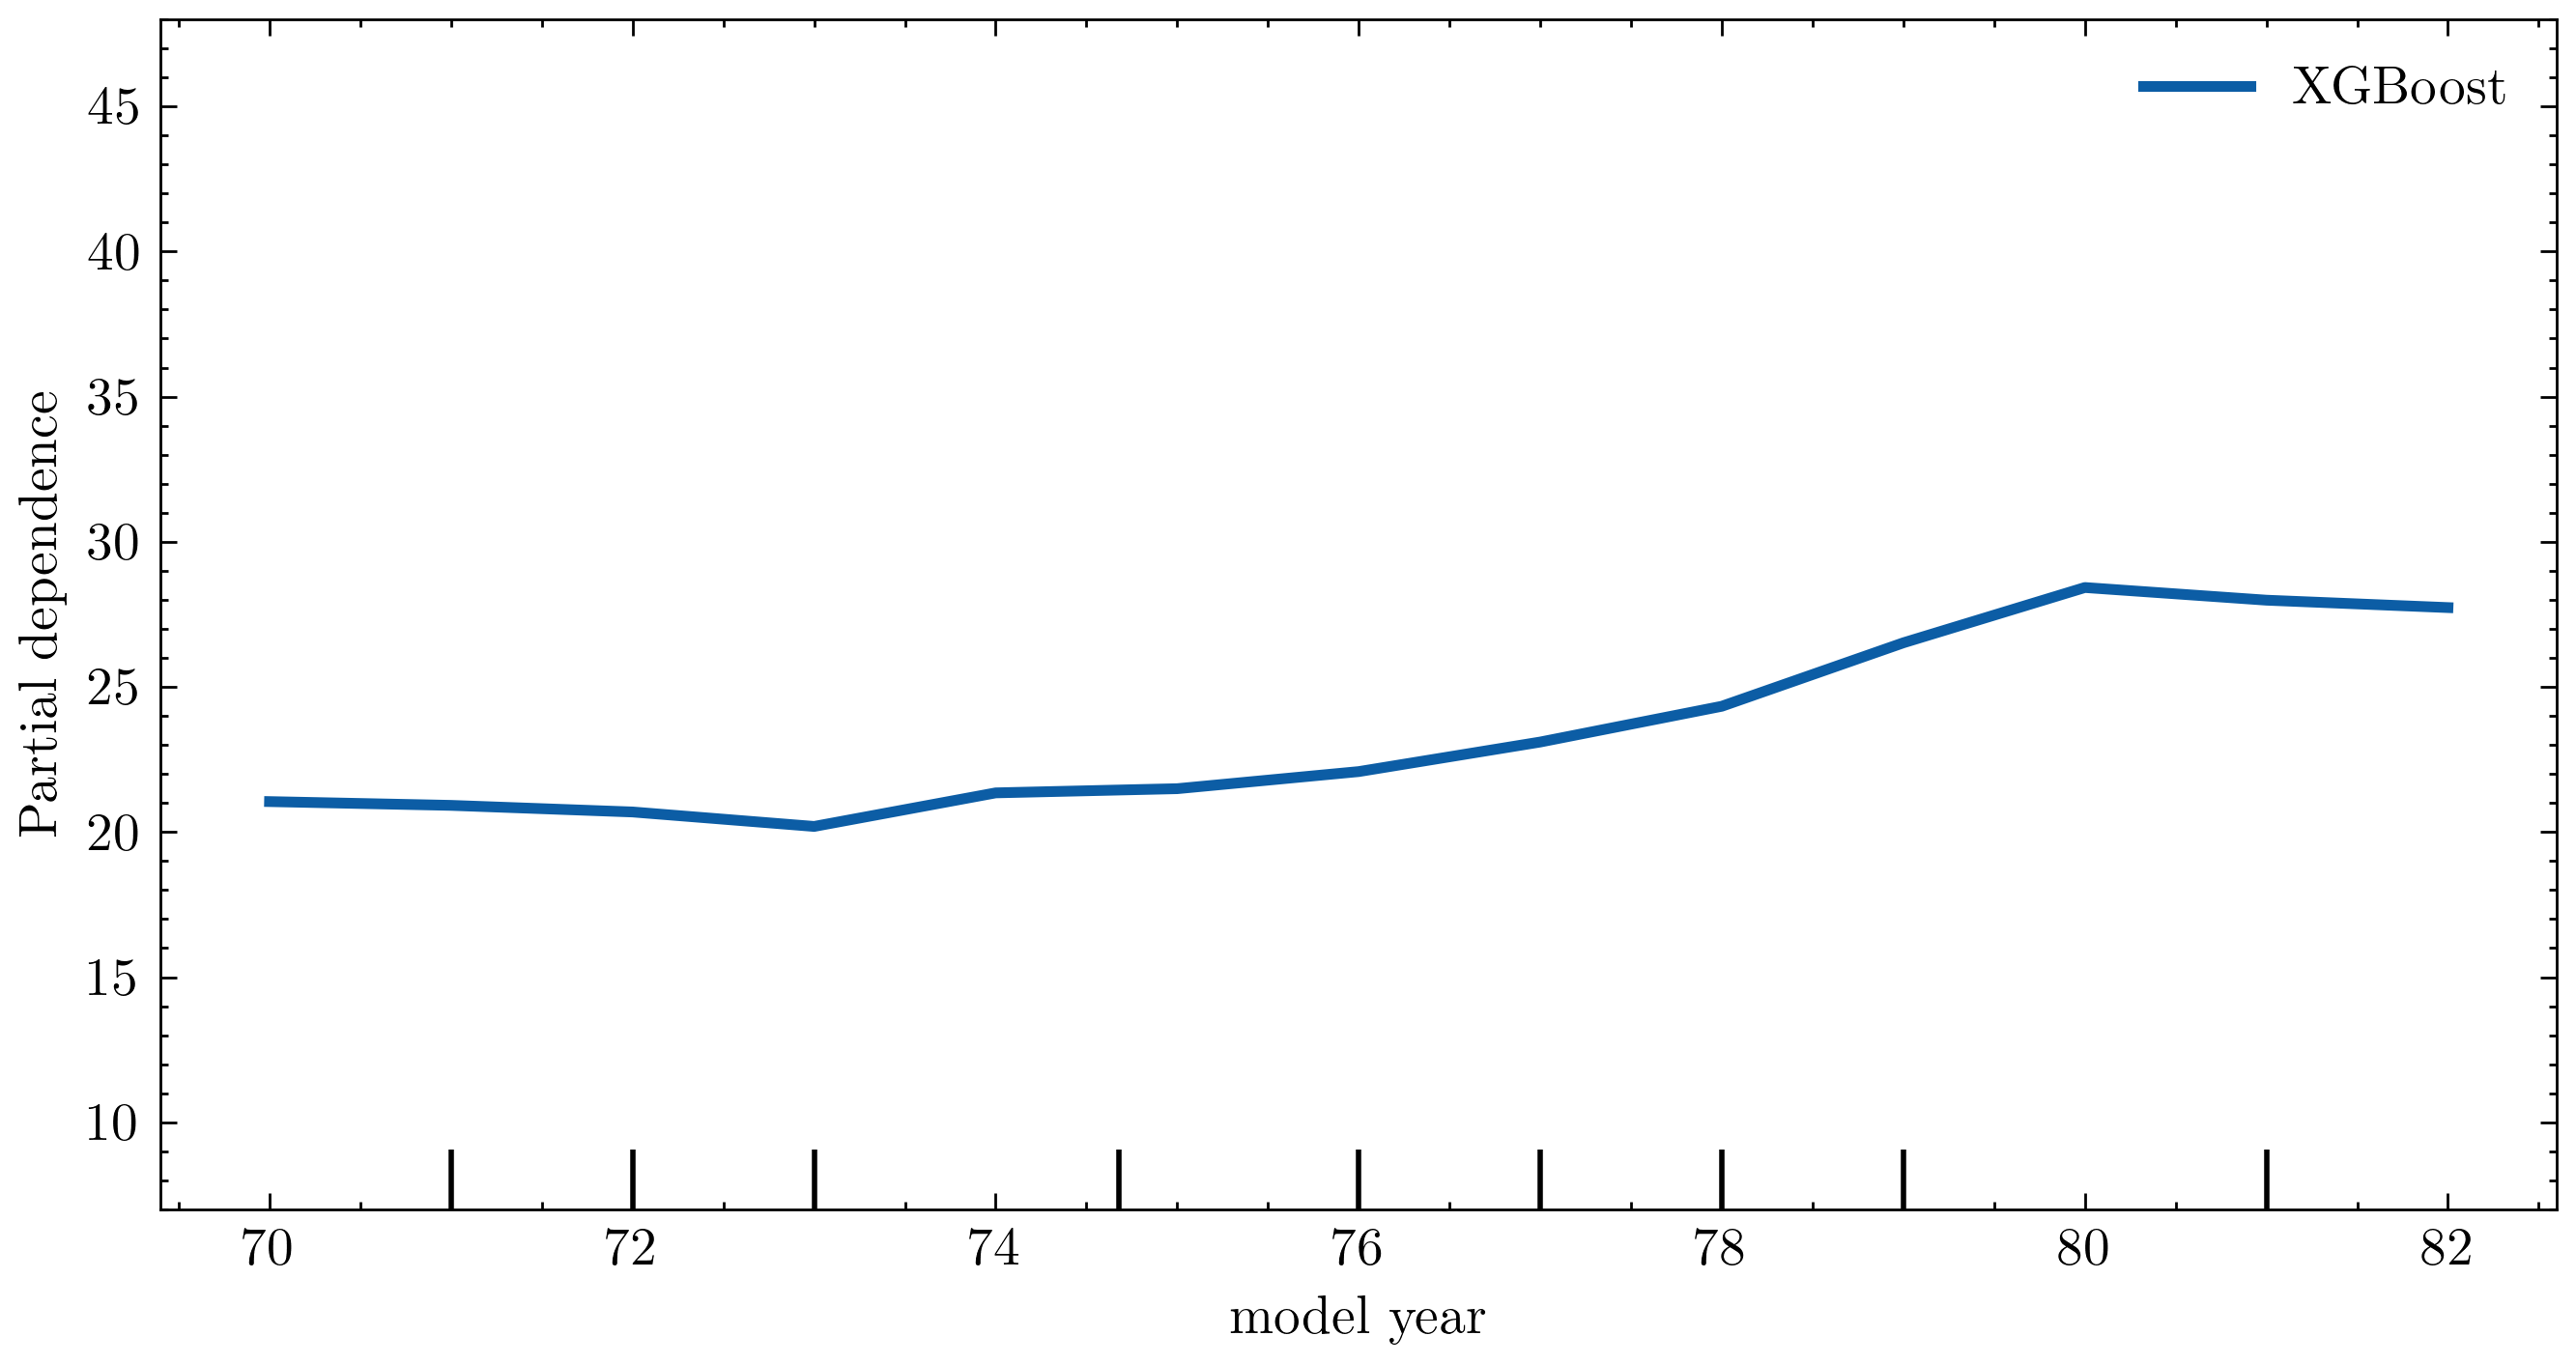

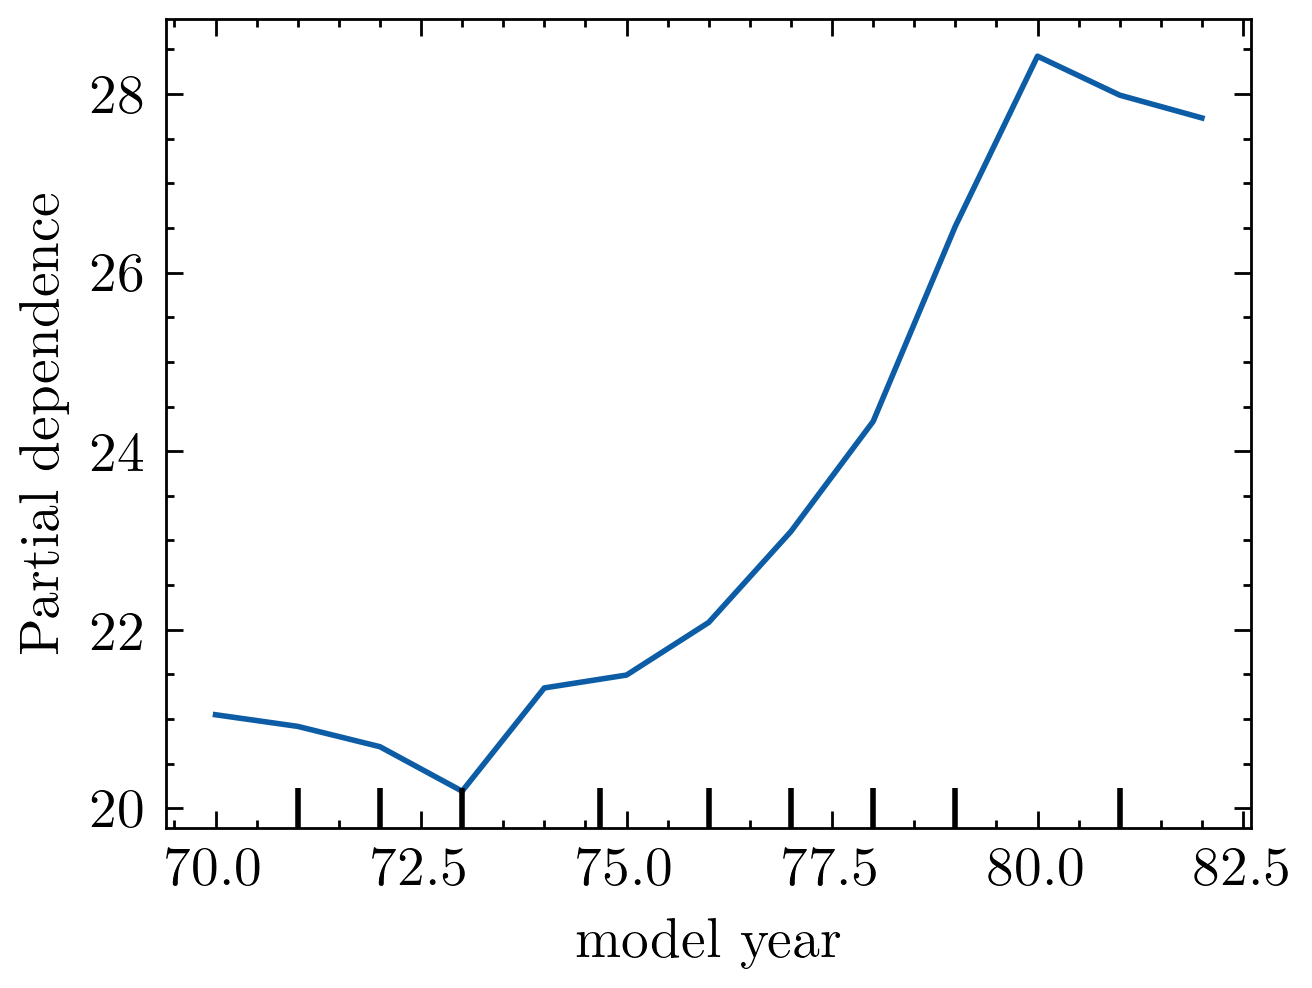

In [35]:
from sklearn.inspection import PartialDependenceDisplay
num_colors = 10
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_colors = color_cycle[:num_colors]
with plt.style.context('science'):
    features = numeric_columns
    fig, (ax1) = plt.subplots(
        1,1, figsize=(8, 4)) 
    xgb_disp = PartialDependenceDisplay.from_estimator(
        xgb_model, x_train, features=[5], feature_names=x.columns,n_jobs=-1)
    # fig.legend(lines, labels, fontsize='small')
    xgb_disp.plot(ax=[ax1],
                 line_kw={"label": "XGBoost", "color": custom_colors[0],"linewidth":2})
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(
            zip(handles, labels)) if l not in labels[:i]]
        return unique
    for ax in [ax1]:
        ax.set_ylim(7, 48)
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    plt.show()

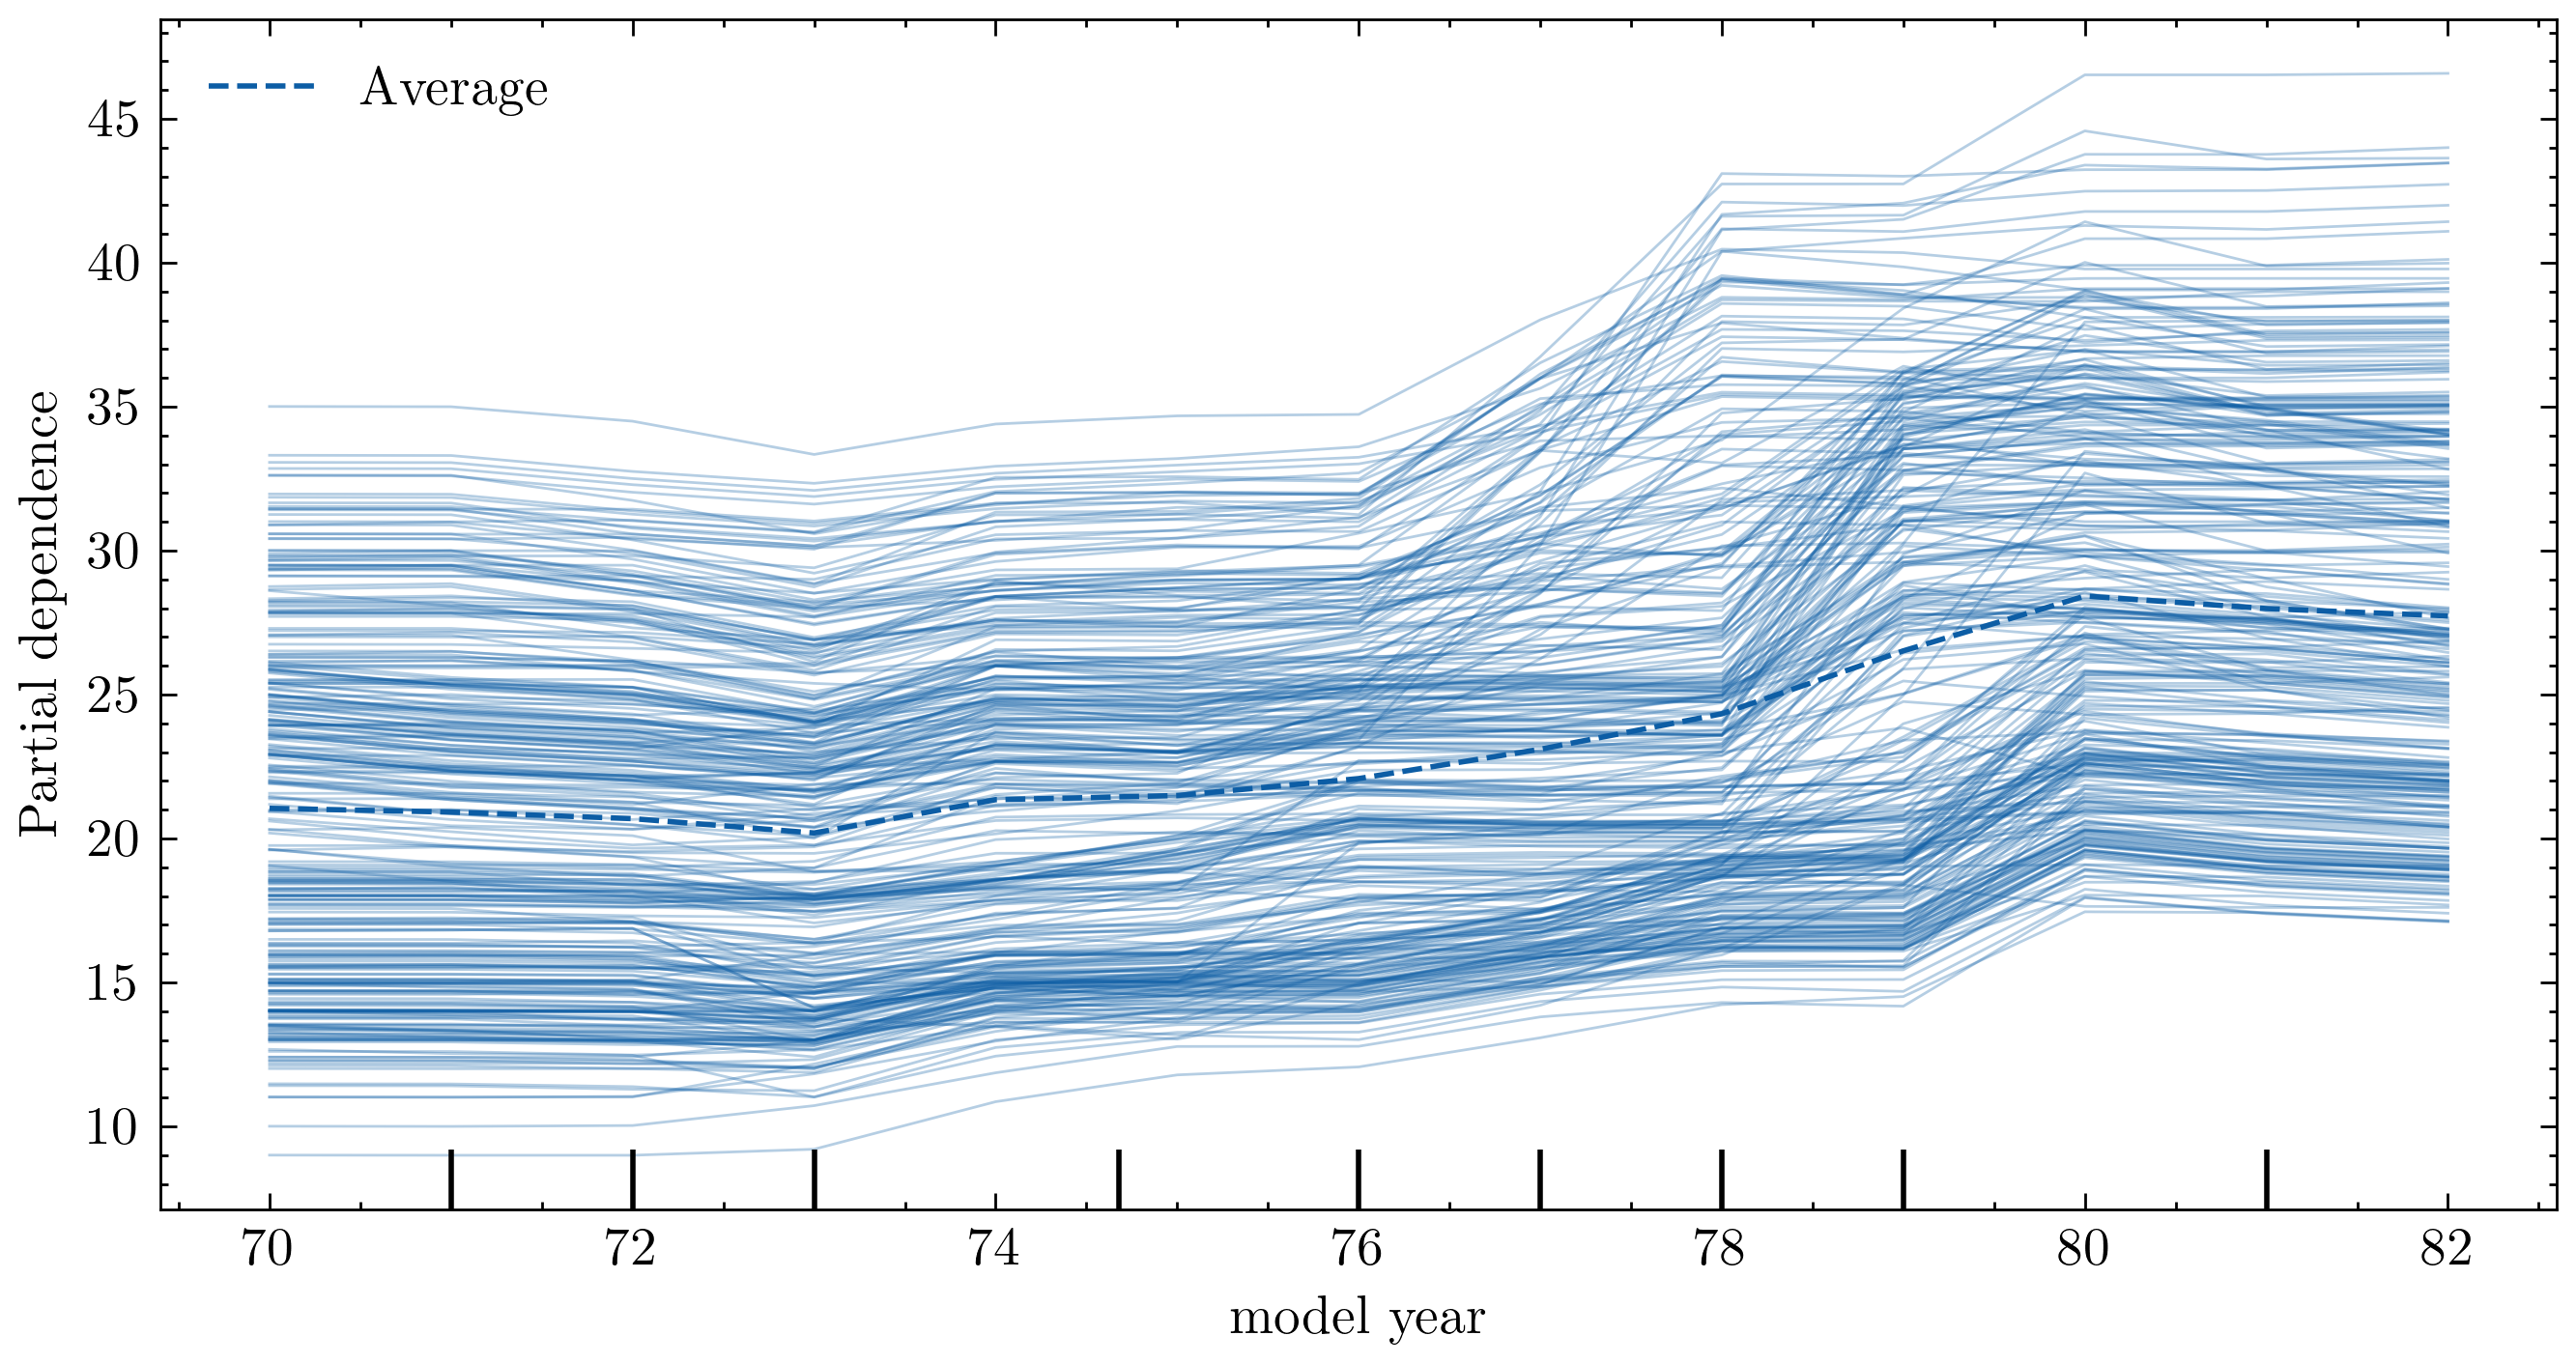

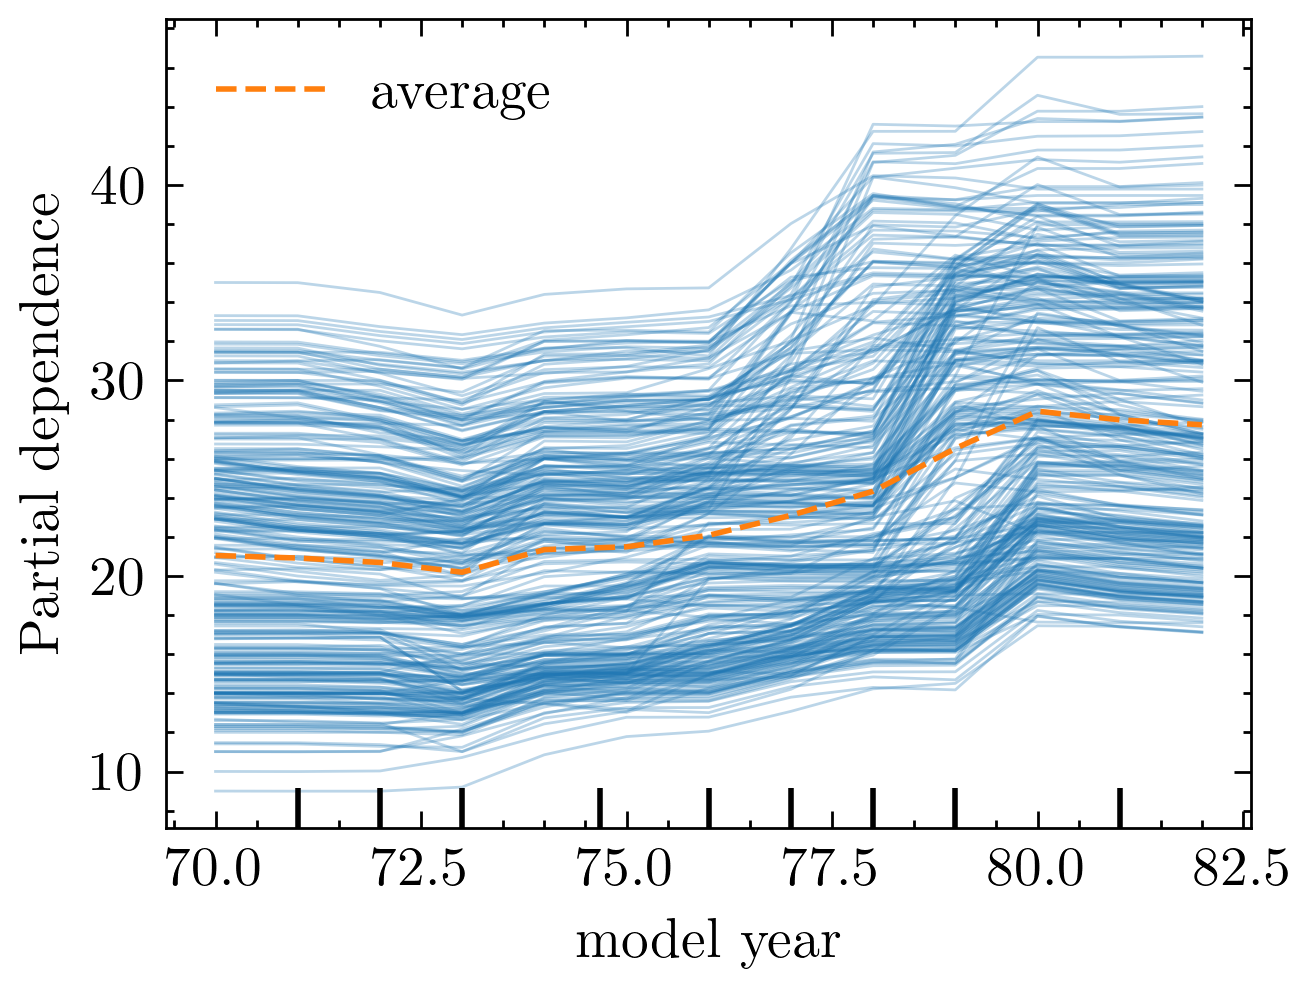

In [31]:
from sklearn.inspection import PartialDependenceDisplay
num_colors = 10
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_colors = color_cycle[:num_colors]
with plt.style.context('science'):
    features = numeric_columns
    fig, (ax1) = plt.subplots(
        1, 1, figsize=(8, 4)) 
    xgb_disp = PartialDependenceDisplay.from_estimator(
        xgb_model, x_train, features=[5], feature_names=x.columns,n_jobs=-1,kind="both")
    # fig.legend(lines, labels, fontsize='small')
    xgb_disp.plot(ax=[ax1],
                 line_kw={"label": "Average", "color": custom_colors[0]})
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(
            zip(handles, labels)) if l not in labels[:i]]
        return unique

    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    plt.show()